In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('alzheimers_disease_data.csv')

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

***NO NULL VALUES***

In [5]:
df.duplicated().sum()

0

**NO DUPLICATES**

In [6]:
df.drop(columns = {'DoctorInCharge'}, inplace = True)

In [8]:
df['Age'].unique()

array([73, 89, 74, 86, 68, 75, 72, 87, 78, 84, 64, 69, 63, 65, 82, 77, 71,
       83, 79, 67, 66, 70, 85, 60, 88, 62, 81, 61, 80, 90, 76],
      dtype=int64)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


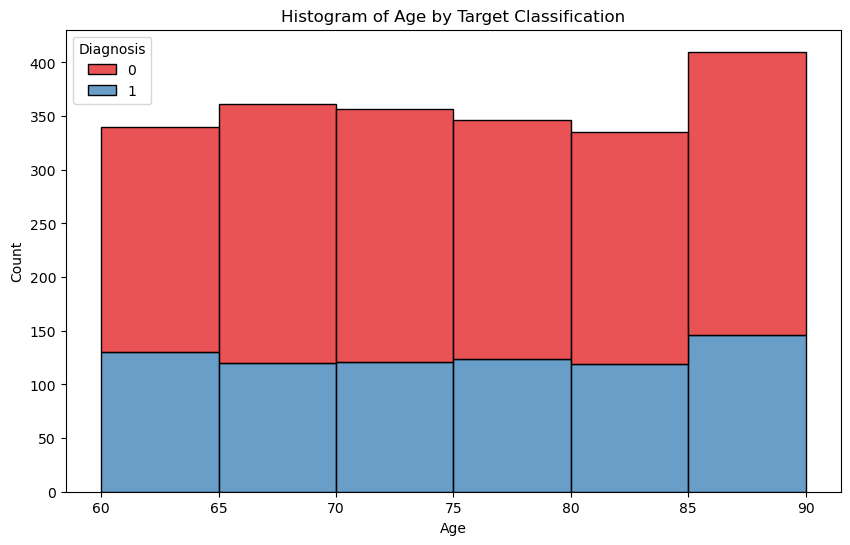

In [12]:
## Effect of Age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Diagnosis', multiple='stack', bins=6, palette='Set1')
plt.title('Histogram of Age by Target Classification')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Not getting much evidence, lets get the percentage of positive diagnosis.

C:\Users\Ranjeet Singh\AppData\Local\Temp\ipykernel_32512\927184152.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = df.groupby('Age_bin')['Diagnosis'].mean().reset_index()
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


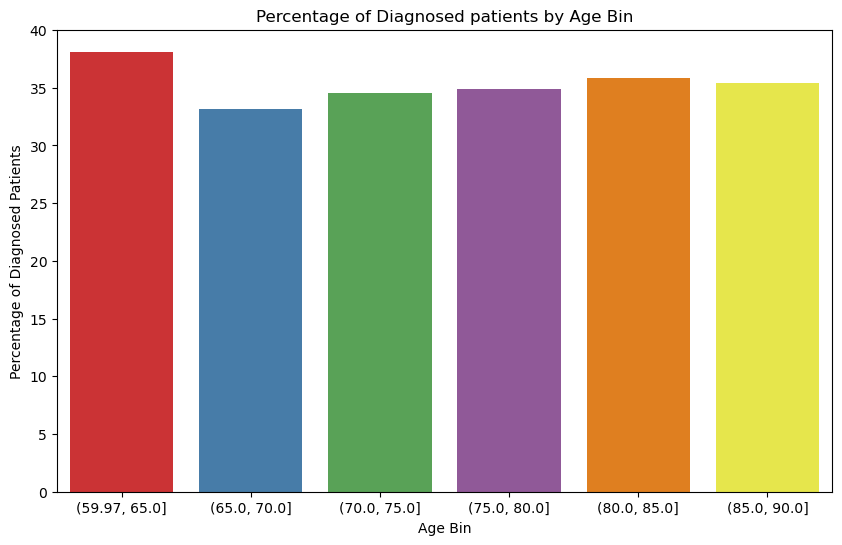

In [22]:
bins = 6
df['Age_bin'] = pd.cut(df['Age'], bins=bins)

percentage_df = df.groupby('Age_bin')['Diagnosis'].mean().reset_index()
percentage_df['Diagnosis'] *= 100  # Convert to percentage

# Plotting the percentages
plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, x='Age_bin', y='Diagnosis', palette='Set1')
plt.title('Percentage of Diagnosed patients by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Percentage of Diagnosed Patients')
plt.show()

As per the web, the chances of diagnosis increase with age after 65. However, this is not prominent in the given data. Will check how models perform if the Age feature is included or not.

In [24]:
## How gender affects the diagnosis

gender_df = df.groupby('Gender')['Diagnosis'].mean().reset_index()
gender_df['Diagnosis']*= 100
gender_df['Gender'] = gender_df['Gender'].apply(lambda x : 'Male' if x == 0 else 'Female' )

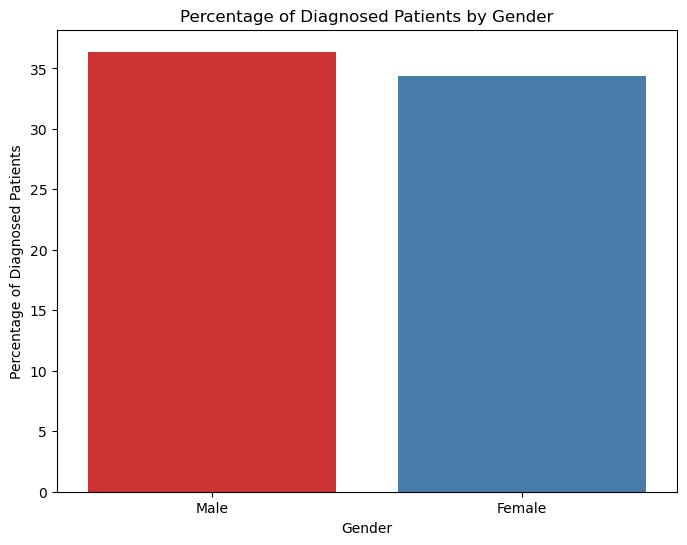

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_df, x='Gender', y='Diagnosis', palette='Set1')
plt.title('Percentage of Diagnosed Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Diagnosed Patients')
plt.show()

The gender of the patient is not a strong feature to classify the diagnosis.

In [27]:
## Effect of Ethnicity
ethnicity_df = df.groupby('Ethnicity')['Diagnosis'].mean().reset_index()
ethnicity_df['Diagnosis']*= 100

eth_dict = {0 : 'Caucasian', 1 : 'African American', 2 : 'Asian' , 3 : 'Other'}

ethnicity_df['Ethnicity'] = ethnicity_df['Ethnicity'].apply(lambda x : eth_dict[x])

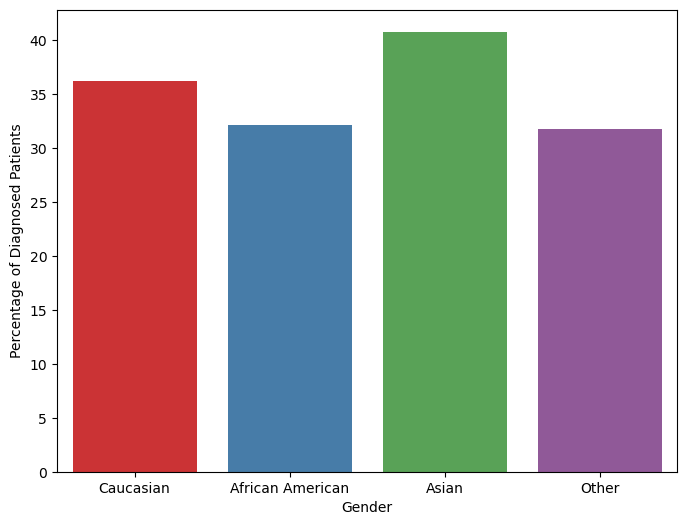

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(data=ethnicity_df, x='Ethnicity', y='Diagnosis', palette='Set1')
plt.xlabel('Gender')
plt.ylabel('Percentage of Diagnosed Patients')
plt.show()

Prominent in Asian and Caucasians. Maybe divide the data encoding Asian and Caucasian as 1 and rest as 0.

In [31]:
df['EducationLevel'].unique()

array([2, 0, 1, 3], dtype=int64)

In [33]:
## Education Level 

edu_df = df.groupby('EducationLevel')['Diagnosis'].mean().reset_index()
edu_df['Diagnosis'] *= 100

edu_dict = {0 :'None' , 1: 'High School' , 2: 'Bachelors' , 3: 'Higher'}

edu_df['EducationLevel'] = edu_df['EducationLevel'].apply(lambda x : edu_dict[x])

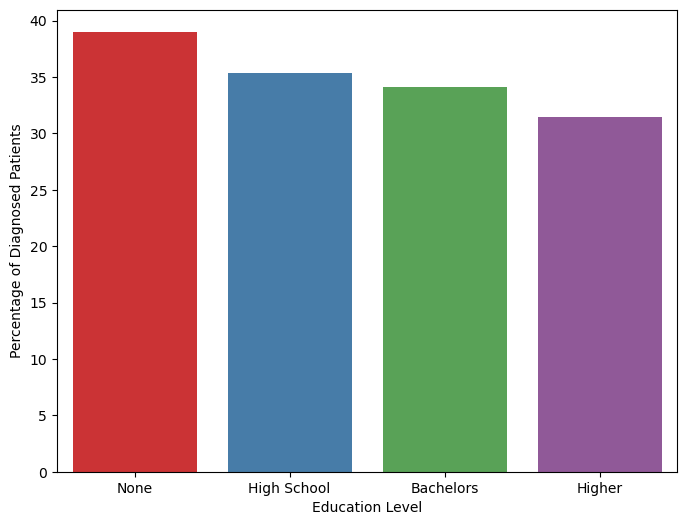

In [39]:
plt.figure(figsize=(8, 6))
sns.barplot(data=edu_df, x='EducationLevel', y='Diagnosis', palette='Set1')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Diagnosed Patients')

plt.show()

The chances of diagnosis decreases as the education level increases. This can be used as ordinal categorical variable or maybe split through high school and bachelors.

In [45]:
#BMI Effect 

bmi_bins = [0, 18.5, 24.9, 29.9, float('inf')]
bmi_labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

df['BMI_category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)



In [49]:
bmi_df = df.groupby('BMI_category')['Diagnosis'].mean().reset_index()
bmi_df['Diagnosis']*= 100


C:\Users\Ranjeet Singh\AppData\Local\Temp\ipykernel_32512\3757668094.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_df = df.groupby('BMI_category')['Diagnosis'].mean().reset_index()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


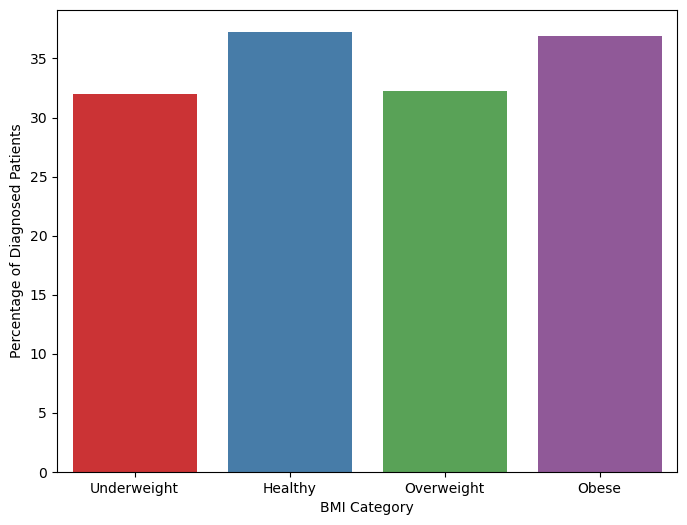

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(data=bmi_df, x='BMI_category', y='Diagnosis', palette='Set1')
plt.xlabel('BMI Category')
plt.ylabel('Percentage of Diagnosed Patients')

plt.show()

There is no such relation of BMI with the diagnosis. So this feature might not be useful for prediction.

In [54]:
## Smoking Effect

smoking_df = df.groupby('Smoking')['Diagnosis'].mean().reset_index()
smoking_df['Diagnosis']*= 100

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


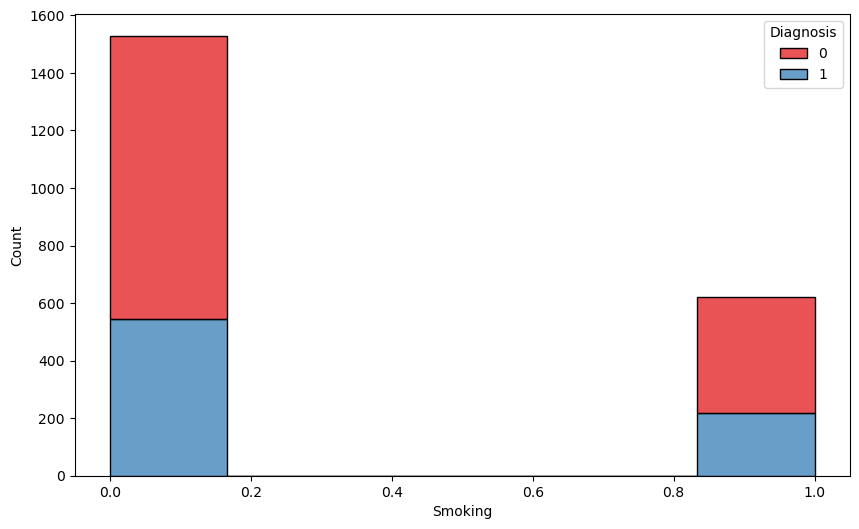

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Smoking', hue='Diagnosis', multiple='stack', bins=6, palette='Set1')

plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

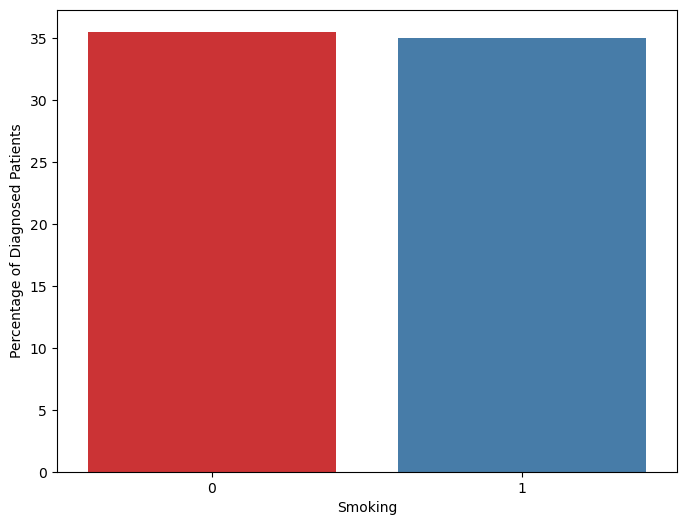

In [57]:
plt.figure(figsize=(8, 6))
sns.barplot(data=smoking_df, x='Smoking', y='Diagnosis', palette='Set1')
plt.xlabel('Smoking')
plt.ylabel('Percentage of Diagnosed Patients')

plt.show()

Since the percentage is nearly same, the smoking habit of the patient does not contribute to the diagnosis.